# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTING DATASET

In [2]:
dataset = pd.read_csv("/content/Salary_Data.csv")

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#INDEPENDENT AND DEPENDENT VARIABLES

In [5]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [6]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

#SPLITTING THE DATASET

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [9]:
X_train

array([ 9.6,  4. ,  5.3,  7.9,  2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3,
       10.5,  3. ,  2.2,  5.9,  6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,
        4.9,  4. ])

In [10]:
X_test

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7])

In [11]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [12]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [13]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# ML ALGORITHMS - SLR

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
#Predicting the test 
y_pred = regressor.predict(X_test)

In [16]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [17]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

#FOR MEASURING THE ACCURACY

In [18]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred= y_pred)

#squared True returns MSE  values, False returns RMSE values
mse = mean_squared_error(y_true = y_test, y_pred= y_pred) #default = True
rmse = mean_squared_error(y_true = y_test, y_pred= y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred= y_pred)
rsquare = r2_score(y_true = y_test, y_pred= y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 2446.1723690465055
MSE: 12823412.298126549
RMSE: 3580.979237321343
MAPE: 0.042009635296206715
Adj.Rsquare: 0.988169515729126


#DATA VISUALISATION

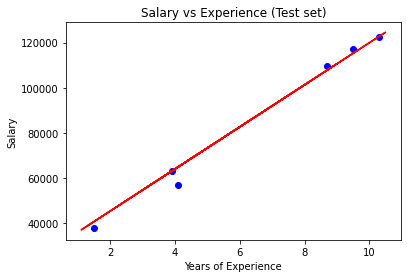

In [19]:
# Visualizing the test set results
plt.scatter(X_test, y_test, color= 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

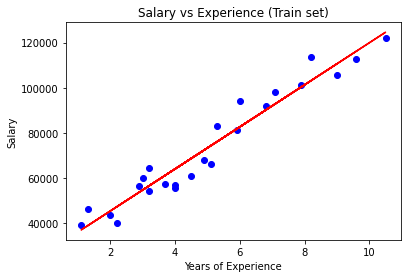

In [20]:
#Visualizing the train set results
plt.scatter(X_train, y_train, color= 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#PREDICTION FOR A NEW DATAPOINT

In [21]:
newdata = pd.Series([6,12])
data_pred = pd.DataFrame(newdata, columns= ['YearsExperience'])

In [22]:
data_pred

,YearsExperience
0,6
1,12


In [23]:
regressor.predict(data_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 82655.549911  , 138531.00067138])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

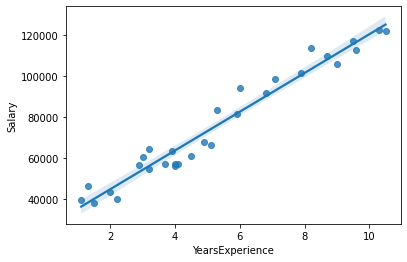

In [24]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

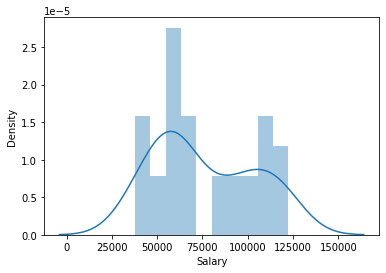

In [25]:
sns.distplot(dataset['Salary'], kde = True, bins = 10)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

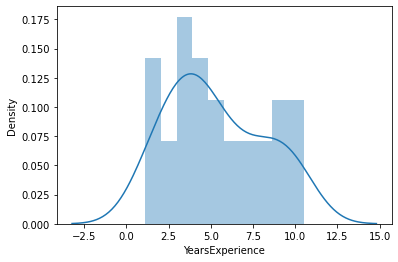

In [26]:
sns.distplot(dataset['YearsExperience'], kde = True, bins = 10)


# TRANSFORMATIONS

In [27]:
data_log = np.log(dataset.iloc[:, 0])

In [28]:
data_log

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

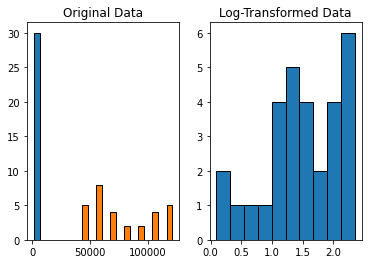

In [29]:
# define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

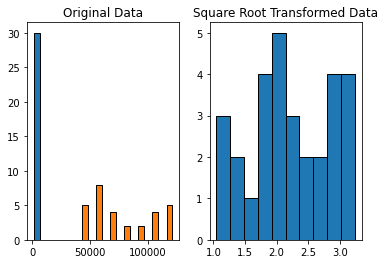

In [30]:
#create square root log-transformed data
data_sqrt = np.sqrt(dataset.iloc[:, 0])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

Text(0.5, 1.0, 'Cube Root Transformed Data')

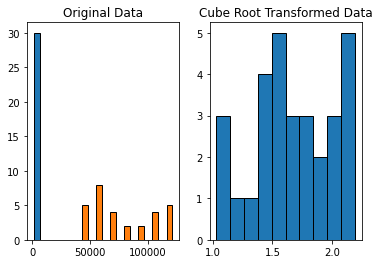

In [31]:
#create cube root log-transformed data
data_cbrt = np.cbrt(dataset.iloc[:, 0])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_cbrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Exp Transformed Data')

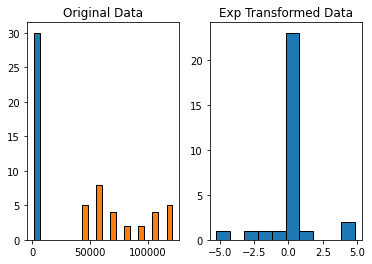

In [32]:
#Exp transofrmation

exp = np.polyfit(X, np.log(dataset.iloc[:,0]),deg = 29)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(exp, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Exp Transformed Data')

Text(0.5, 1.0, 'Cox Transformed Data')

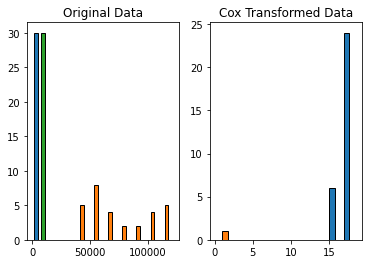

In [33]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
dataset.insert(len(dataset.columns), 'A_Boxcox', 
             boxcox(dataset.iloc[:, 0])[0])
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(boxcox(dataset.iloc[:, 1]), edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cox Transformed Data')

Text(0.5, 1.0, 'Square Transformed Data')

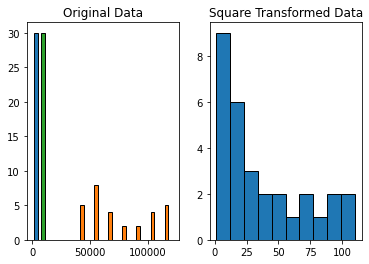

In [34]:
#Sq Transformation in Python
data_sq = dataset.iloc[:,0]**2
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_sq, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Transformed Data')